# 선형 회귀 이론 및 실습

## 선형 회귀 모델의 최적화 방법

### 정규방정식

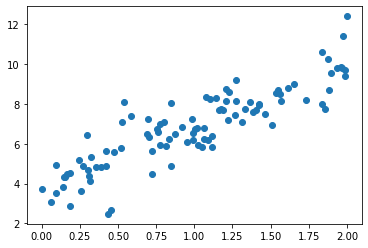

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=2*np.random.rand(100,1) # 0~1 사이의 균일분포: (100x1) 모양
y=4+3*x+np.random.randn(100,1) # normal 분포 mu=0,var=1: (100,1) 모양 -> 노이즈를 위해 추가
plt.scatter(x,y)
plt.show()

# 이 데이터로 선형회귀 그려보기

In [ ]:
x_bias = np.c_[np.ones((100,1)),x] 
# np.c_: arrapy 형태에 새 컬럼을 추가한다.
# np.ones((100,1)) : 100x1 형태의 1을 추출
x_bias 
# bias 텀을 추가하지 않으면 w0 w1를 가져와야하는데 w1만 가져오기 때문에 가상의 데이터 1을 붙여준것

In [5]:
# 최적의 파라미터 구하기
theta_best = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y)
theta_best
# 실제 y는 4+3x 예측은 3.8+3.1x
# noise 때문에 정확히 예측할 수 없다.

array([[3.79962542],
       [3.06268427]])

In [7]:
x_new = np.array(([0],[2])) # x에 0,2를 넣는다 -> 0과 2를 예측 해보자
x_new_beta = np.c_[np.ones((2,1)),x_new] # x_new 에 bias term을 추가
x_new_beta

array([[1., 0.],
       [1., 2.]])

In [9]:
# 예측하기
prediction = x_new_beta.dot(theta_best) # y=W*x를 구현 theta_best-> W
prediction

array([[3.79962542],
       [9.92499396]])

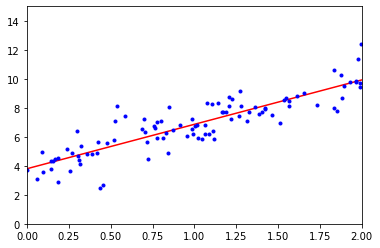

In [10]:
# 시각화
plt.plot(x_new,prediction,'r-') # 예측선
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [11]:
# sklearn 라이브러리 사용
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # 객체 생성
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)
# W0, W1 찍어보기

[3.79962542] [[3.06268427]]


### 배치 경사 하강법

In [17]:
import numpy as np

x = 2 * np.random.rand(100,1)
x_b = np.c_[np.ones((100,1)),x]
y= 4+3*x+np.random.randn(100,1)

learning_rate = 0.001 # 처음엔 작게 시작
iterations =1000 # 1000번 반복
m = x_b.shape[0] # x 데이터 수

theta = np.random.randn(2,1) # 초기화

for iteration in range(iterations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y) # 2번 방법
    theta = theta - (learning_rate*gradients)
theta

array([[3.35239499],
       [3.57145261]])

### 확률적 경사 하강법

In [21]:
epochs = 1000
t0,t1 = 5, 50 # 학습 스케쥴 (하이퍼 파라미터)
m= x_b.shape[0] # 100개 x 데이터 수

def laerning_schedule(t):
    return t0/(t+t1) # t가 커질 수록 리턴 값은 작아진다.

theta = np.random.randn(2,1) # 벡터 초기화: 2x1 크기의 평균 0, 분산1 정규 분포

for epoch in range(epochs): # 1000번
    for i in range(m): # 데이터 수 만큼
        random_index = np.random.randint(m) # 0~m-1 까지의 랜덤 숫자 한개
        xi = x_b[random_index:random_index+1] # 1,2 크기
        yi = y[random_index:random_index+1] # 1,1 크기
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        learning_rate = laerning_schedule(epoch*m + i) # t 가 점점 커진다.
        theta = theta - learning_rate*gradients
theta

array([[0.5794169 ],
       [0.19317262]])

### 미니배치 경사 하강법

In [22]:
iterations=1000
minibatch_size=20
m= x_b.shape[0] # 100개 x 데이터 수
t0,t1 = 5, 50 # 학습 스케쥴 (하이퍼 파라미터)

def laerning_schedule(t):
    return t0/(t+t1) # t가 커질 수록 리턴 값은 작아진다.

theta = np.random.randn(2,1) # 벡터 초기화: 2x1 크기의 평균 0, 분산1 정규 분포

for iterations in range(iterations):
    shuffled_indices = np.random.permutation(m) # 랜덤하게 순서를 만든다.
    x_b_shuffled = x_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        xi = x_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        learning_rate = laerning_schedule(iterations*m + i) # t 가 점점 커진다.
        theta = theta - learning_rate*gradients
theta

array([[4.03423653],
       [3.08947856]])